**I DID PEPER-DISEASE CLASSIFICATION-MODEL**

**I TOOK REFERENCE FROM** :

https://github.com/codebasics/potato-disease-classification/blob/main/training/potato-disease-classification-model.ipynb
  
  **THANKS TO CODEBASICS FOR WONDERFUL  EXPLANATION ON THE YT PLATFORM**

 **I HAVE USED THE FOLLOWING DATASET:**
https://www.kaggle.com/datasets/arjuntejaswi/plant-village



In [ ]:
#import appropraite libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
#google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE=256#256*256
BATCH_SIZE=32#batch siize is selected in general as zweiunddreizig
CHANNELS=3
EPOCHS=50

In [ ]:
DATASET=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/project practise msc/peper disease",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=BATCH_SIZE)

Found 2475 files belonging to 2 classes.


In [ ]:
class_names=DATASET.class_names
class_names#folder name is class name

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy']

In [ ]:
len(DATASET)

78

(256, 256, 3)


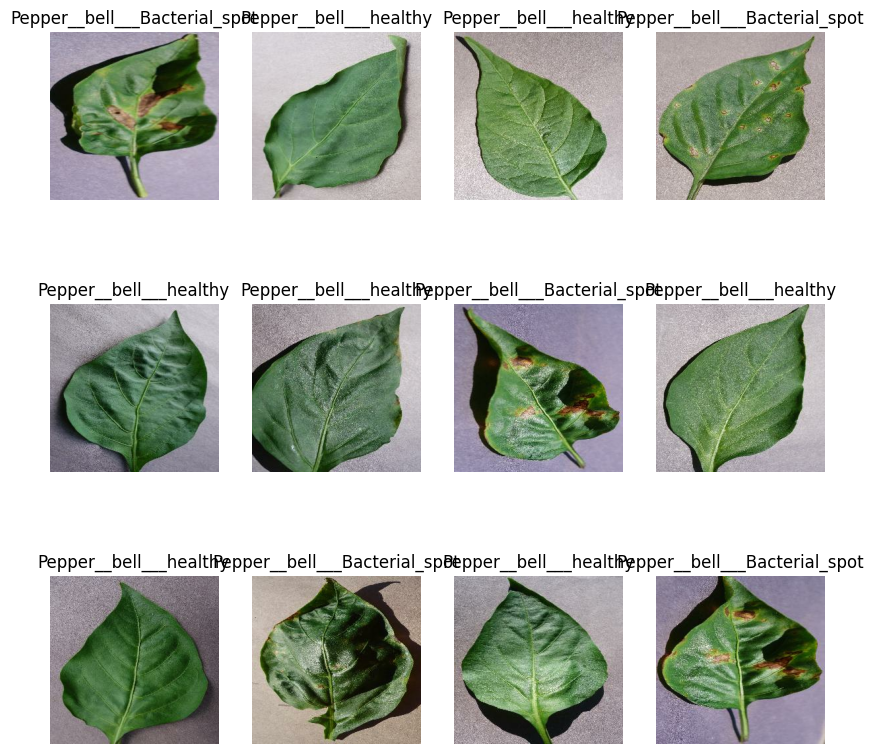

In [ ]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in DATASET.take(1):
  for i in range(12):
    ax=plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.axis('off')#hiding no
    plt.title(class_names[label_batch[i]])
  print(image_batch[0].shape)

In [ ]:
train_size=0.8
len(DATASET)*train_size#DATASET


62.400000000000006

In [ ]:
train_ds=DATASET.take(54)
len(train_ds)#1

54

In [ ]:
test_ds=DATASET.skip(54)
len(test_ds)#2

24

In [ ]:
val_size=0.1
len(DATASET)*val_size#3

7.800000000000001

In [ ]:
val_ds=test_ds.take(12)
len(val_ds)#4

12

In [ ]:
test_ds=test_ds.skip(12)
len(test_ds)#5

12

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.7,val_split=0.15,test_split=0.15,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)

    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(DATASET)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

11

In [ ]:
len(test_ds)

13

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),layers.experimental.preprocessing.Rescaling(1./255),])

In [ ]:
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2),])

In [ ]:
train_ds=train_ds.map(lambda x,y:(data_augmentation(x,training=True),y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([resize_and_rescale,
                         layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(64,(3,3),activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(n_classes,activation='softmax'),
                      ])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['Accuracy'])

In [ ]:
history=model.fit(train_ds,batch_size=BATCH_SIZE,validation_data=val_ds,verbose=1,epochs=50,)

Epoch 1/50
54/54 [==============================] - 442s 5s/step - loss: 0.5771 - Accuracy: 0.7014 - val_loss: 0.3116 - val_Accuracy: 0.8864
Epoch 2/50
54/54 [==============================] - 251s 5s/step - loss: 0.2728 - Accuracy: 0.9034 - val_loss: 0.1858 - val_Accuracy: 0.9489
Epoch 3/50
54/54 [==============================] - 253s 5s/step - loss: 0.1945 - Accuracy: 0.9340 - val_loss: 0.3766 - val_Accuracy: 0.9347
Epoch 4/50
54/54 [==============================] - 260s 5s/step - loss: 0.1626 - Accuracy: 0.9450 - val_loss: 0.1074 - val_Accuracy: 0.9744
Epoch 5/50
54/54 [==============================] - 263s 5s/step - loss: 0.0780 - Accuracy: 0.9728 - val_loss: 0.3692 - val_Accuracy: 0.8892
Epoch 6/50
54/54 [==============================] - 249s 5s/step - loss: 0.0738 - Accuracy: 0.9774 - val_loss: 0.0820 - val_Accuracy: 0.9915
Epoch 7/50
54/54 [==============================] - 248s 5s/step - loss: 0.0516 - Accuracy: 0.9838 - val_loss: 0.0593 - val_Accuracy: 0.9943
Epoch 8/50
54

In [ ]:
scores=model.evaluate(test_ds)

13/13 [==============================] - 28s 1s/step - loss: 0.0292 - Accuracy: 0.9856


In [ ]:
scores

[0.029220104217529297, 0.9855769276618958]

In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history.keys()

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])

In [ ]:
len(history.history['loss'])

50

In [ ]:
history.history['loss'][:5]

[0.5770840048789978,
 0.27279648184776306,
 0.19448697566986084,
 0.1625913381576538,
 0.07796287536621094]

In [ ]:
acc=history.history['Accuracy']
val_acc=history.history['val_Accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

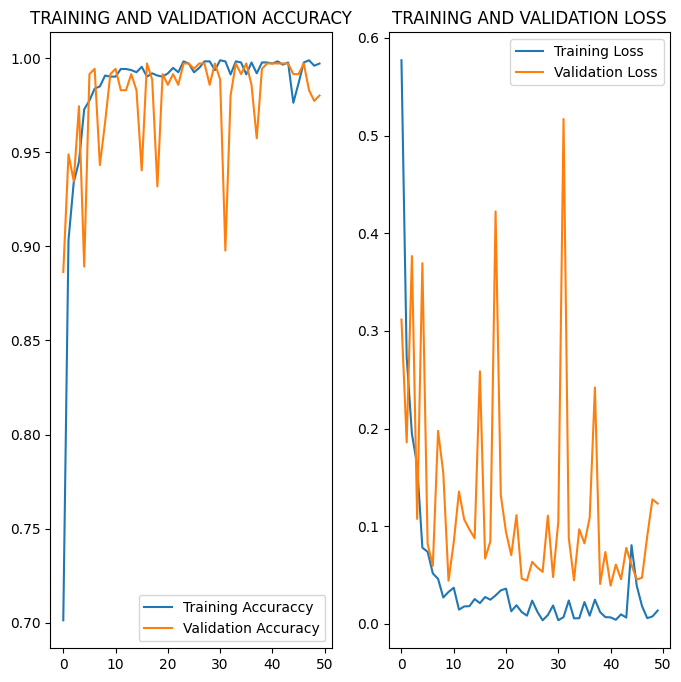

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuraccy')
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('TRAINING AND VALIDATION ACCURACY')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label='Training Loss')
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title("TRAINING AND VALIDATION LOSS")
plt.show()

first image to predict
actual label: Pepper__bell___healthy
1/1 [==============================] - 1s 1s/step
predicted label: Pepper__bell___healthy


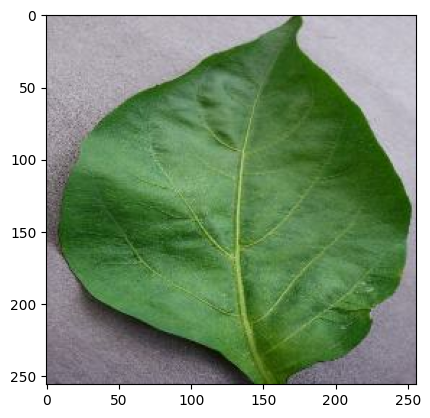

In [ ]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):

  first_image=images_batch[0].numpy().astype('uint8')
  first_label=labels_batch[0].numpy()

  print("first image to predict")
  plt.imshow(first_image)
  print("actual label:",class_names[first_label])

  batch_prediction=model.predict(images_batch)
  print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class,confidence

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    predicted_class,confidence=predict(model,images[i].numpy())
    actual_class=class_names[labels[i]]

    plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}.\n Confidence:{confidence}%")

    plt.axis("off")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Get true labels and predicted labels for the test set
true_labels = []
predicted_labels = []

for images, labels in test_ds:
    true_labels.extend(labels.numpy())
    predictions = model.predict(images)
    predicted_labels.extend(np.argmax(predictions, axis=1))

# Convert to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=class_names)

# Output the classification report
print("Classification Report:\n", class_report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Output the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


In [ ]:
import seaborn as sns
def plot_confusion_matrix(true_labels, predicted_labels, class_names):
    cm = confusion_matrix(true_labels, predicted_labels)

    plt.figure(figsize=(8, 8))
    sns.set(font_scale=1.2)  # Adjust font size for better readability

    ax = sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names,
    )

    ax.set(xlabel="Predicted Labels", ylabel="True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(true_labels, predicted_labels, class_names)